<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="ffffff">
tensorflow layers code

</font>
</h1>

pariya branch

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

#train_data_dir = r'E:\projectDataset\0minidataset\archive\sl_train'
#test_data_dir = r'E:\projectDataset\0minidataset\archive\sl_test'
#val_data_dir =  r'E:\projectDataset\0minidataset\archive\sl_valid'


train_data_dir = r'E:\projectDataset\tZoghi\db6\train'
test_data_dir = r'E:\projectDataset\tZoghi\db6\test'
val_data_dir =  r'E:\projectDataset\tZoghi\db6\val'

input_target = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)




model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(6, activation='softmax')
])




Found 10901 images belonging to 6 classes.
Found 1452 images belonging to 6 classes.
Found 1246 images belonging to 6 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:

early_stopping = EarlyStopping(patience=30)
model_checkpoint = ModelCheckpoint(
    "../Checkpoints/my_checkpoint_layers2", save_best_only=True)

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=499,
        initial_epoch=20,
    validation_data=val_generator,
    callbacks=[early_stopping,model_checkpoint]
)

Epoch 21/499
341/341 [==============================] - 8131s 24s/step - loss: 1.1685 - accuracy: 0.6357 - val_loss: 0.7159 - val_accuracy: 0.7376
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_layers2\assets
Epoch 22/499
341/341 [==============================] - 5317s 16s/step - loss: 0.4697 - accuracy: 0.8410 - val_loss: 0.5041 - val_accuracy: 0.8202
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_layers2\assets
Epoch 23/499
341/341 [==============================] - 5778s 17s/step - loss: 0.3856 - accuracy: 0.8735 - val_loss: 0.4211 - val_accuracy: 0.8612
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_layers2\assets
Epoch 24/499
341/341 [==============================] - 5026s 15s/step - loss: 0.3269 - accuracy: 0.8866 - val_loss: 0.2781 - val_accuracy: 0.9173
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_layers2\assets
Epoch 25/499
341/341 [==============================] - 5052s 15s/step - loss: 0.2808 - accuracy

In [42]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

46/46 [==============================] - 141s 3s/step - loss: 0.0085 - accuracy: 0.9993
Test Loss: 0.008464734070003033
Test Accuracy: 0.9993112683296204


Found 2275 images belonging to 9 classes.
Found 668 images belonging to 9 classes.
Found 962 images belonging to 9 classes.
Found 9 images belonging to 1 classes.
Found 18 images belonging to 9 classes.


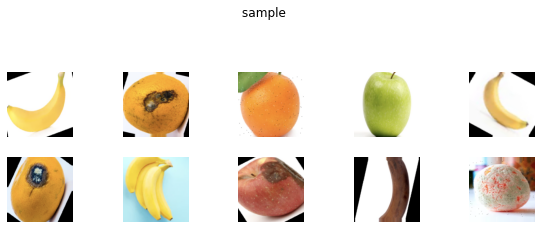

In [52]:
import matplotlib.pyplot as plt
image_batch, label_batch = train_generator.next()

plt.figure(figsize=(10,9))
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  plt.axis('off')
_ = plt.suptitle(" sample")

In [53]:
print(train_generator.class_indices)
print(test_generator.class_indices)
print(val_generator.class_indices)


{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 128)     73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 128)    

In [15]:
# Plot the predicted labels for a sample of images from the test data
image_batch, label_batch = val_generator.next()
print(len(label_batch))
for n in label_batch:
    print(n)

32
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [55]:
for i, layer in enumerate(model.layers):
   print(i, layer.name, layer.trainable)

0 conv2d_12 True
1 conv2d_13 True
2 batch_normalization_10 True
3 max_pooling2d_6 True
4 dropout_10 True
5 conv2d_14 True
6 conv2d_15 True
7 batch_normalization_11 True
8 max_pooling2d_7 True
9 dropout_11 True
10 conv2d_16 True
11 conv2d_17 True
12 batch_normalization_12 True
13 max_pooling2d_8 True
14 dropout_12 True
15 flatten_2 True
16 dense_6 True
17 batch_normalization_13 True
18 dropout_13 True
19 dense_7 True
20 batch_normalization_14 True
21 dropout_14 True
22 dense_8 True


In [43]:
train_loss, train_accuracy = model.evaluate(train_generator)#, steps=len(test_ds)/2
print('Accuracy on test dataset:', train_accuracy)

341/341 [==============================] - 1115s 3s/step - loss: 3.9570e-04 - accuracy: 0.9999
Accuracy on test dataset: 0.9999082684516907


In [44]:
val_loss, val_accuracy = model.evaluate(val_generator)#, steps=len(test_ds)/2
print('Accuracy on test dataset:', train_accuracy)

39/39 [==============================] - 117s 3s/step - loss: 0.0030 - accuracy: 0.9984
Accuracy on test dataset: 0.9999082684516907


In [45]:
result = model.predict(test_generator)
result

array([[9.9999726e-01, 6.4876758e-08, 5.4713986e-08, 1.3136755e-06,
        1.9586835e-08, 1.3526889e-06],
       [1.2073345e-06, 5.8549827e-05, 9.3781143e-01, 7.3579540e-05,
        9.8153737e-07, 6.2054187e-02],
       [3.0579536e-12, 1.0000000e+00, 1.2236889e-15, 3.4145899e-16,
        6.8468527e-13, 5.5306600e-13],
       ...,
       [9.9998701e-01, 2.4111475e-07, 3.2028320e-09, 6.0288294e-06,
        4.9546429e-11, 6.7318570e-06],
       [1.0574074e-06, 1.9855906e-06, 2.2437069e-05, 3.3309645e-06,
        3.6012102e-09, 9.9997115e-01],
       [1.5926198e-10, 1.0000000e+00, 1.5176948e-11, 3.1821519e-09,
        3.7552956e-09, 2.8113087e-10]], dtype=float32)

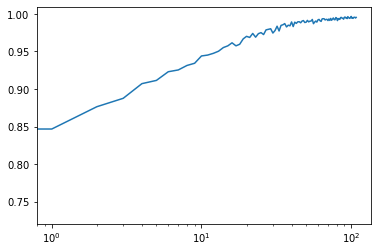

In [59]:
plt.semilogx( history.history["accuracy"])

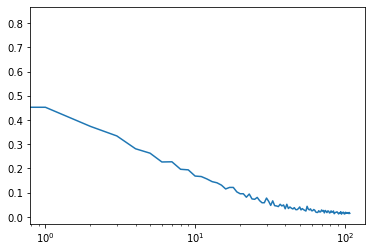

In [46]:
plt.semilogx( history.history["loss"])

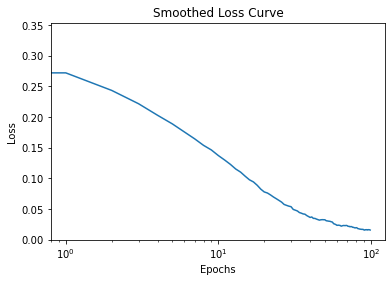

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'history' contains your loss values

# Smooth the loss curve using a rolling mean with window size 10
smoothed_loss = np.convolve(history.history['loss'], np.ones(10) / 10, mode='valid')

# Plot the smoothed loss curve
plt.semilogx(smoothed_loss)
plt.title('Smoothed Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


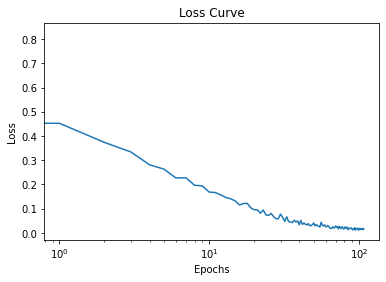

In [57]:
plt.semilogx(history.history['loss'])
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


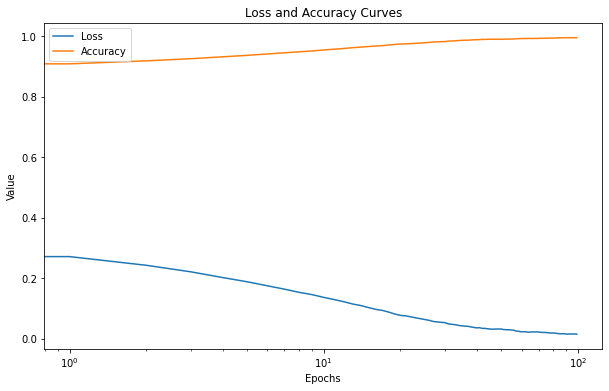

In [58]:

# Assuming 'history' contains your loss and accuracy values

# Smoothing the loss and accuracy curves using a rolling mean with window size 10
smoothed_loss = np.convolve(history.history['loss'], np.ones(10) / 10, mode='valid')
smoothed_accuracy = np.convolve(history.history['accuracy'], np.ones(10) / 10, mode='valid')

# Plotting the smoothed loss and accuracy curves
plt.figure(figsize=(10, 6))  # Set the figure size

plt.semilogx(smoothed_loss, label='Loss')
plt.semilogx(smoothed_accuracy, label='Accuracy')

plt.title('Loss and Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()  # Display the legend
plt.show()




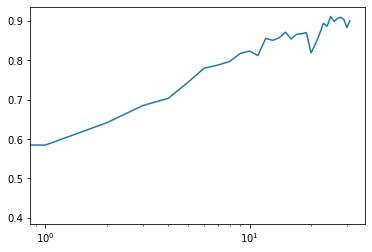

In [60]:
model.save('../models/fruit_disease_classifier_multiLayerfinishAgain.h5')

KeyboardInterrupt: 

In [47]:

predicted_batch = model.predict(train_generator)
import numpy as np
predicted_ids = np.argmax(predicted_batch, axis=-1)
class_names = list(train_generator.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]

image_batch, label_batch = train_generator.next()


In [48]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(train_generator)#, verbose=2

print('Test accuracy:', test_acc)


341/341 [==============================] - 1117s 3s/step - loss: 2.0868e-04 - accuracy: 1.0000
Test accuracy: 1.0


['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


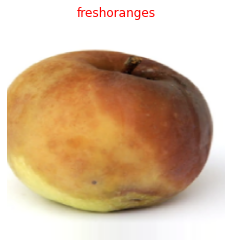

real label : [0. 0. 0. 1. 0. 0.]
predicted: ['0.000', '0.000', '1.000', '0.000', '0.000', '0.000']


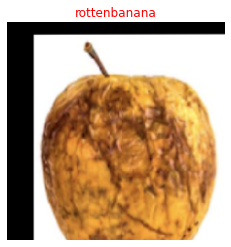

real label : [0. 0. 0. 1. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000']


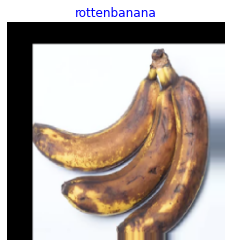

real label : [0. 0. 0. 0. 1. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000']


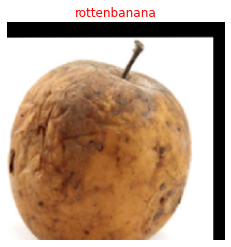

real label : [0. 0. 0. 1. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000']


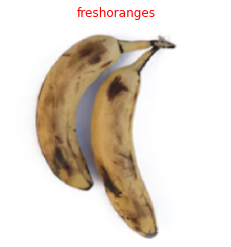

real label : [0. 0. 0. 0. 1. 0.]
predicted: ['0.000', '0.000', '1.000', '0.000', '0.000', '0.000']


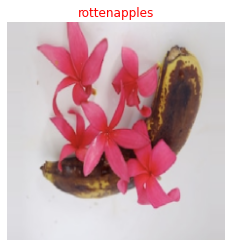

real label : [0. 0. 0. 0. 1. 0.]
predicted: ['0.000', '0.000', '0.000', '1.000', '0.000', '0.000']


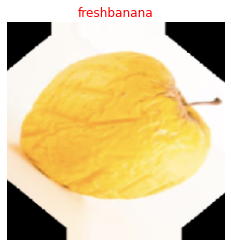

real label : [0. 0. 0. 1. 0. 0.]
predicted: ['0.000', '1.000', '0.000', '0.000', '0.000', '0.000']


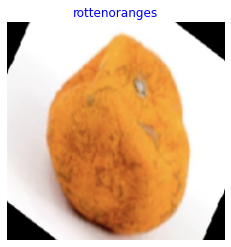

real label : [0. 0. 0. 0. 0. 1.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '1.000']


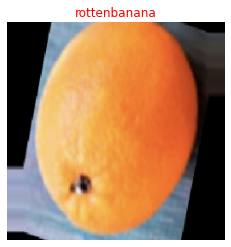

real label : [0. 0. 1. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000']


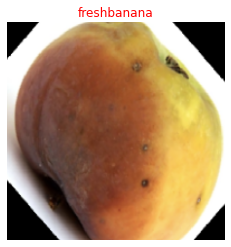

real label : [0. 0. 0. 1. 0. 0.]
predicted: ['0.000', '1.000', '0.000', '0.000', '0.000', '0.000']


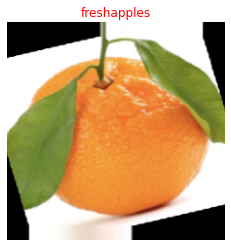

real label : [0. 0. 1. 0. 0. 0.]
predicted: ['1.000', '0.000', '0.000', '0.000', '0.000', '0.000']


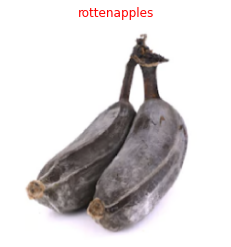

real label : [0. 0. 0. 0. 1. 0.]
predicted: ['0.000', '0.000', '0.000', '1.000', '0.000', '0.000']


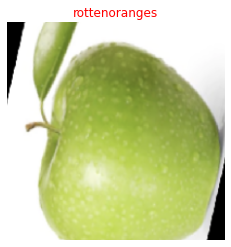

real label : [1. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '1.000']


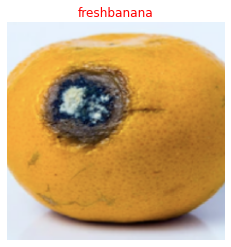

real label : [0. 0. 0. 0. 0. 1.]
predicted: ['0.000', '1.000', '0.000', '0.000', '0.000', '0.000']


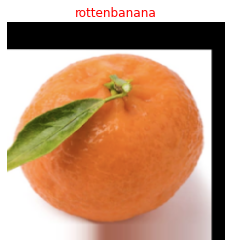

real label : [0. 0. 1. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000']


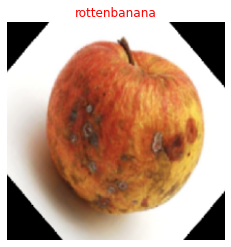

real label : [0. 0. 0. 1. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000']


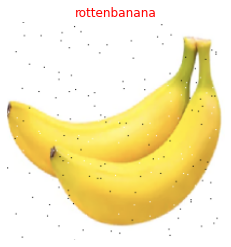

real label : [0. 1. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000']


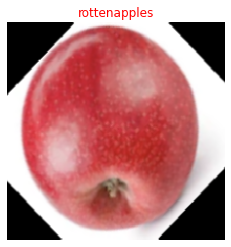

real label : [1. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '1.000', '0.000', '0.000']


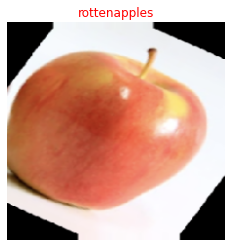

real label : [1. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '1.000', '0.000', '0.000']


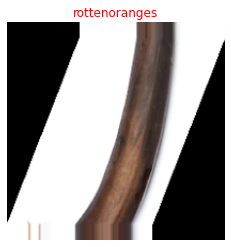

real label : [0. 0. 0. 0. 1. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '1.000']


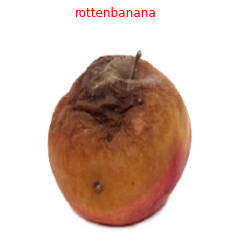

real label : [0. 0. 0. 1. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000']


In [50]:


import matplotlib.pyplot as plt
print(class_names)
for n in range(21):
    plt.axis('off')
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == tf.math.argmax(label_batch[n]) else "red"
  #  plt.title(predicted_class_names[n], color=color)
    plt.title(predicted_class_names[n], color=color)
    plt.show()
    print('real label :',label_batch[n])
    my_formatted_list = [ '%.3f' % elem for elem in predicted_batch[n] ]
    print('predicted:', my_formatted_list)
    

#print(predicted_batch[n])




In [1]:
model = keras.models.load_model(r"E:\projectDataset\Checkpoints\my_checkpoint_layers2")


NameError: name 'keras' is not defined

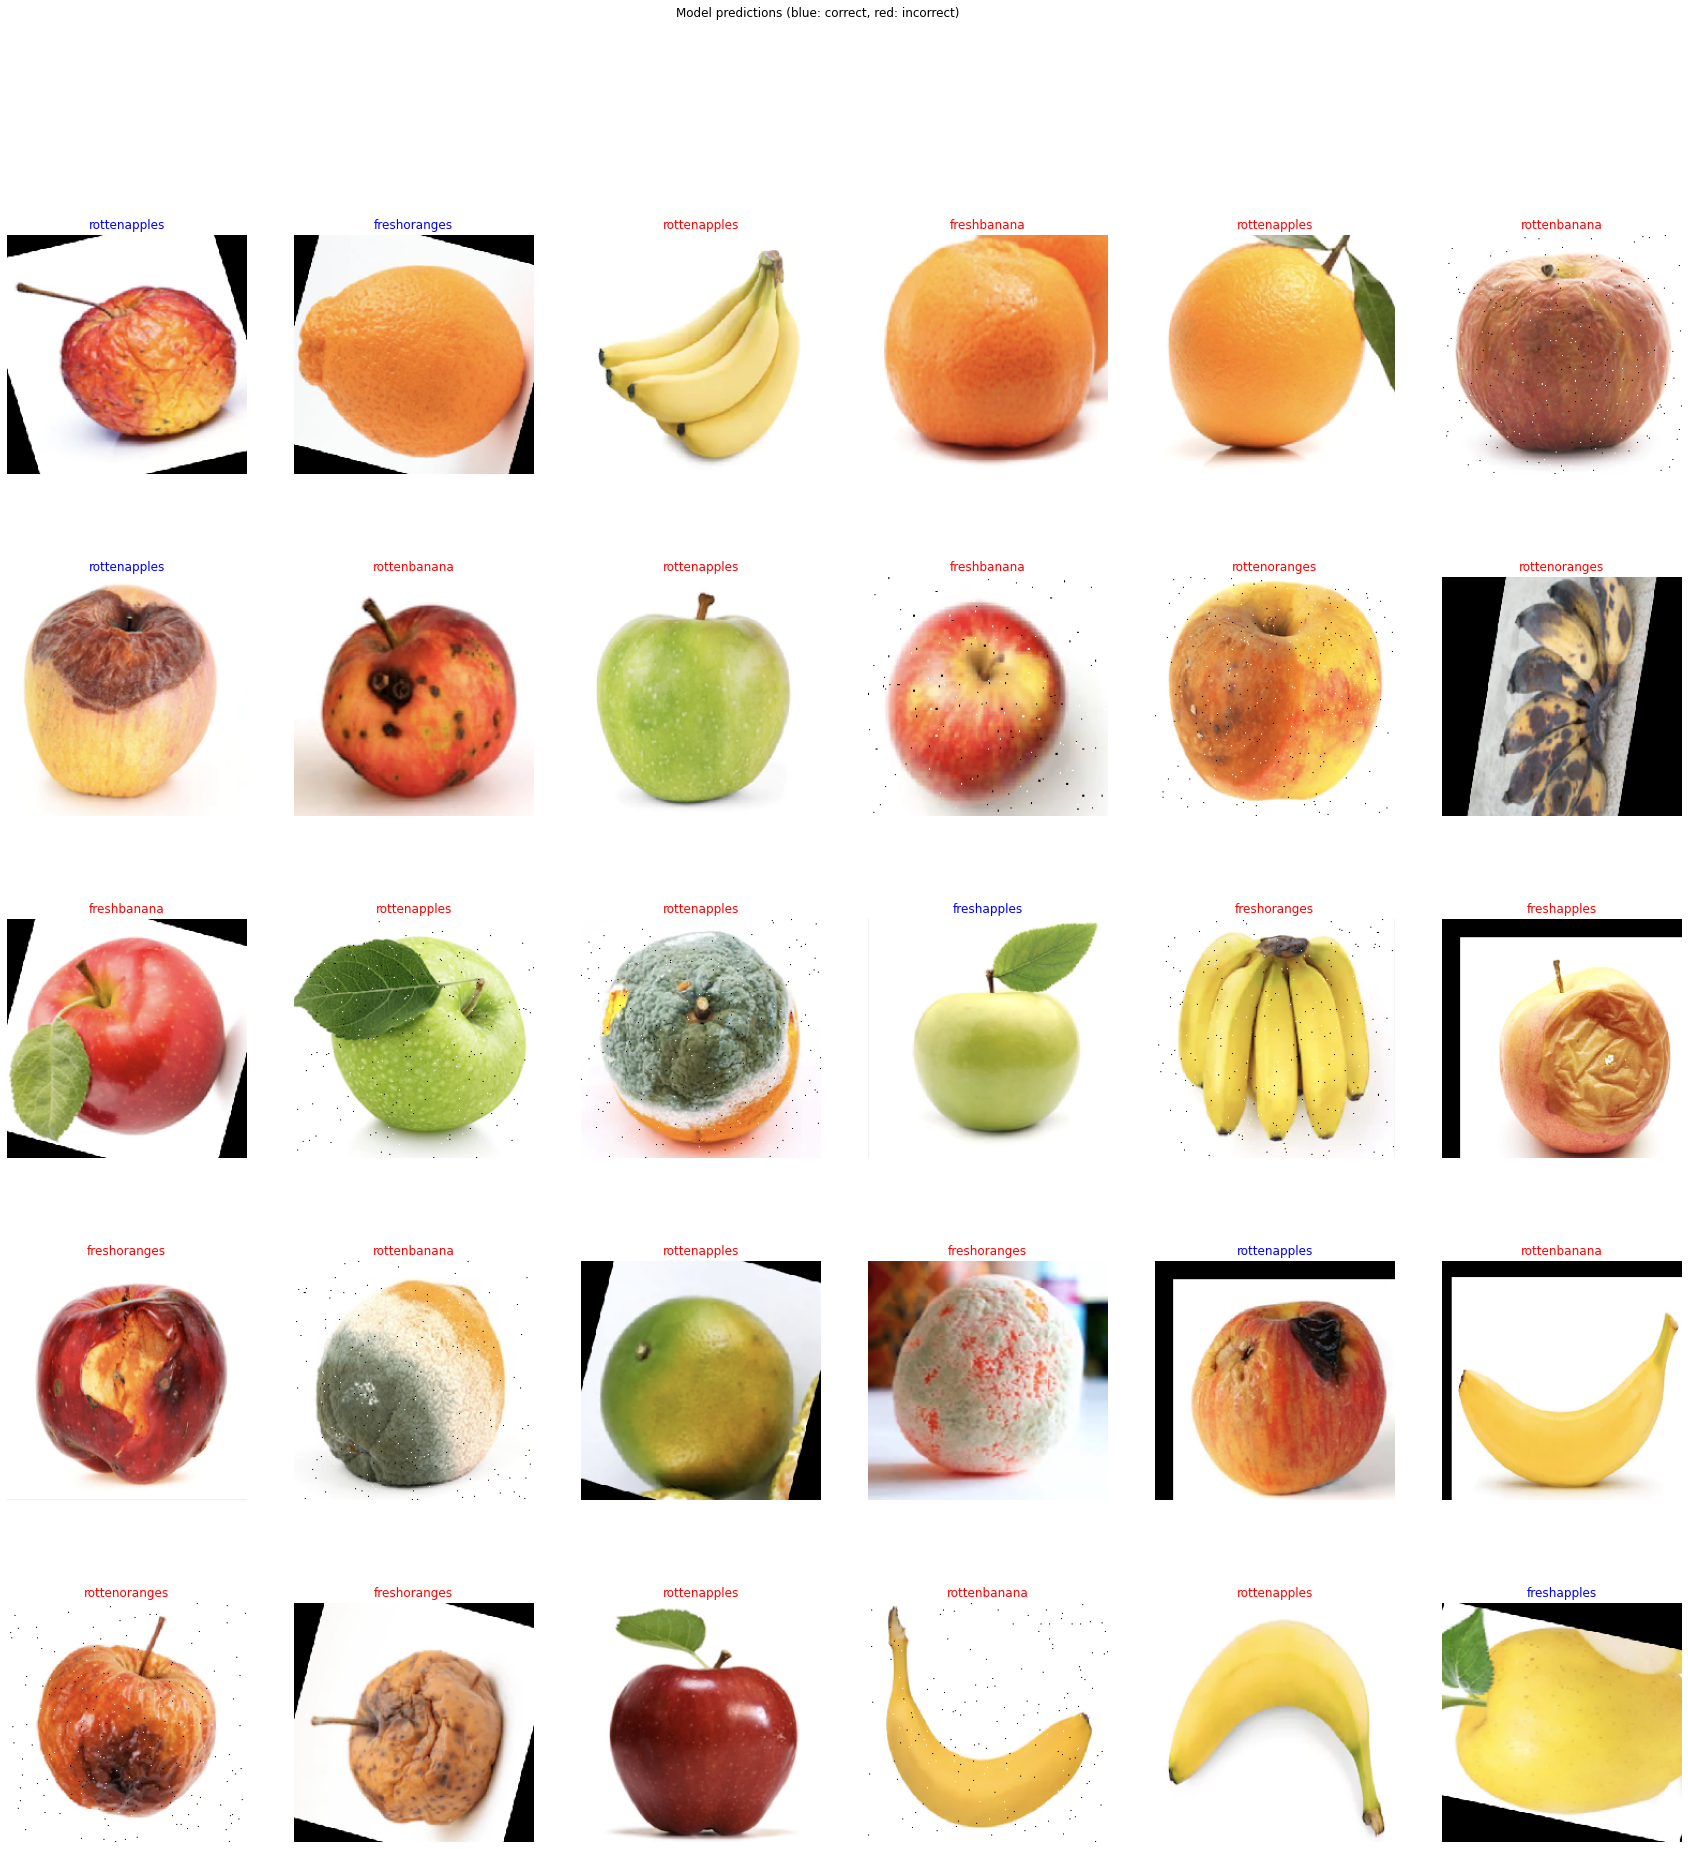

In [65]:


predicted_batch = model.predict(test_generator)
predicted_ids = np.argmax(predicted_batch, axis=-1)
class_names = list(test_generator.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]

import matplotlib.pyplot as plt
image_batch, label_batch = test_generator.next()

plt.figure(figsize=(30,30))
for n in range(30):
    plt.subplot(5,6,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_class_names[np.argmax(label_batch[n])] ==predicted_class_names[np.argmax(predicted_batch[n])] else "red"
    plt.title(predicted_class_names[n], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [86]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the image
image_path = r"E:\projectDataset\tZoghi\db6\test\freshbanana\rotated_by_75_Screen Shot 2018-06-12 at 9.55.02 PM.png"
image = Image.open(image_path)

# Preprocess the image
# Resize the image to the input size expected by your model
input_size = (224, 224)
image = image.resize(input_size)
# Normalize pixel values to the range [0, 1]
image = np.array(image) / 255.0
# Add an extra dimension to represent the batch (assuming single image)
image = np.expand_dims(image, axis=0)

# Load the trained model

# Pass the image through the model
predictions = model.predict(image)

# Interpret the predictions
predicted_class = np.argmax(predictions)
# map the predicted class to its corresponding label or category

print(test_generator.class_indices)

# Print the predicted class
print('Predicted class:', predicted_class)



{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
Predicted class: 1


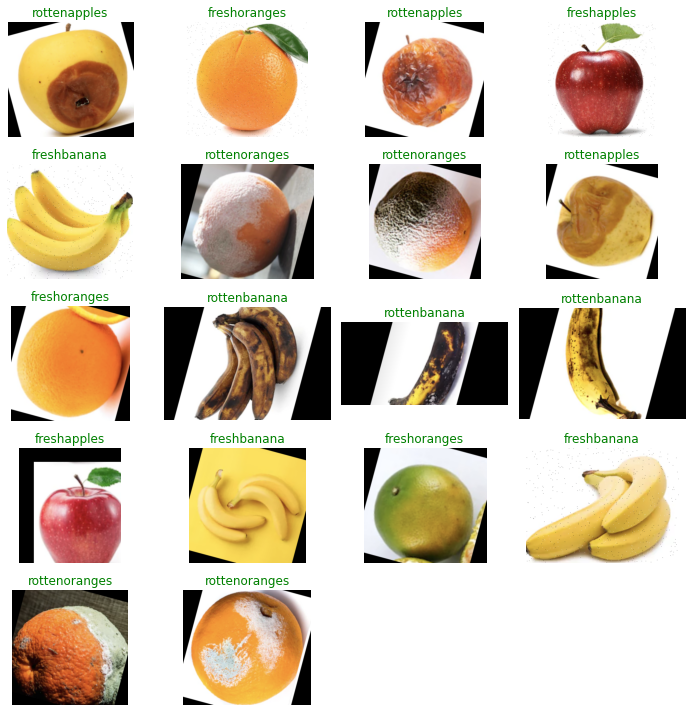

In [99]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


# Define class labels mapping
class_labels = {
    0: 'freshapples',
    1: 'freshbanana',
    2: 'freshoranges',
    3: 'rottenapples',
    4: 'rottenbanana',
    5: 'rottenoranges'
}

# Folder containing the images
folder_path = r"E:\projectDataset\tZoghi\db6\testFinal"

# Get the list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Prepare empty lists to store predictions and correctness
image_paths = []
predictions = []
correctness = []

# Iterate over the image files
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    # Preprocess the image
    input_size = (224, 224)
    image = image.resize(input_size)
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # Pass the image through the model
    prediction = model.predict(image)

    # Interpret the prediction
    predicted_classes = np.argmax(prediction, axis=1)
    predicted_class_labels = [class_labels[class_index] for class_index in predicted_classes]

    # Determine correctness
    ground_truth_label = image_file.split('_')[0]
    correct = ground_truth_label == class_labels[predicted_classes[0]]

    # Append the image path, predicted classes, and correctness to the lists
    image_paths.append(image_path)
    predictions.append(predicted_class_labels)
    correctness.append(correct)

# Display the images, predicted classes, and correctness
num_images = len(image_paths)
rows = int(np.ceil(np.sqrt(num_images)))
cols = int(np.ceil(num_images / rows))

fig = plt.figure(figsize=(10, 10))

for i in range(num_images):
    # Load the image
    image = Image.open(image_paths[i])

    # Create a subplot
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(image)
    ax.axis('off')

    # Set the title color based on correctness
    title_color = 'green'
    ax.set_title(predictions[i][0], color=title_color)

plt.tight_layout()
plt.show()



In [101]:
import cv2
# Define class labels mapping
class_labels = {
    0: 'class1',
    1: 'class2',
    # Add more class labels as needed
}

# Preprocess the image
input_size = (224, 224)

# Function to perform image preprocessing
def preprocess_image(image):
    image = Image.fromarray(image)
    image = image.resize(input_size)
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Function to perform prediction on the image
def predict_image(image):
    # Preprocess the image
    processed_image = preprocess_image(image)
    
    # Pass the preprocessed image through the model
    prediction = model.predict(processed_image)
    
    # Interpret the prediction
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read frame from the webcam
    ret, frame = cap.read()
    
    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)
    
    # Display the frame
    cv2.imshow('Webcam', frame)
    
    # Perform prediction on the frame
    predicted_class = predict_image(frame)
    
    # Display the predicted class
    cv2.putText(frame, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Webcam with Prediction', frame)
    
    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-101-33e2eaa8c856>", line 48, in <module>
    predicted_class = predict_image(frame)
  File "<ipython-input-101-33e2eaa8c856>", line 30, in predict_image
    predicted_class = class_labels[predicted_class_index]
KeyError: 4

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\genericpath.py", line 19, in exists
    os.stat(path)
OSError: [WinError 123] The file

TypeError: object of type 'NoneType' has no len()

: 